### CME Polar PLot


- All associated to X-class flares 


- Spot size $\rightarrow$ SMART AR total area or flux 


- Arm length $\rightarrow$ CME speed


- Arm width $\rightarrow$ CME Halo Flag

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sunpy.map
import matplotlib.colors
import matplotlib as mpl
from matplotlib.colors import colorConverter

In [3]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [4]:
# Props
dfx = df[['cme_angle', 
          'cme_halo', 
          'cme_speed', 
          'smart_observation_time', 
          'smart_hcx_position', 
          'smart_hcy_position',
          'smart_total_area',
          'smart_total_flux', 
          'goes_flux']]

dfx = dfx.dropna(how='any')
dfx.goes_flux = np.log10(dfx.goes_flux)
dfx.smart_total_flux = dfx.smart_total_flux.values.astype(float)
dfx = dfx.reset_index(drop=True)

# Look at big CMEs only
x = dfx[ (dfx['goes_flux'] > -4.0)  & (dfx['goes_flux'] <= -3.0) ]  
x = x.reset_index(drop=True)

# Halos
x['cme_halo'] = x['cme_halo'].replace([1.0],1)
x['cme_halo'] = x['cme_halo'].replace([2.0],2)
x['cme_halo'] = x['cme_halo'].replace([3.0],3)
x['cme_halo'] = x['cme_halo'].replace([4.0],4)

# colours and sizes
x_dates = x['smart_observation_time'].values.astype(float)
size_a = 50*x.smart_total_area/x.smart_total_area.mean()
size_f = 50*x.smart_total_flux/x.smart_total_flux.mean()

<ipython-input-5-d5a6ad9b9e3b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000'], fontsize=16)


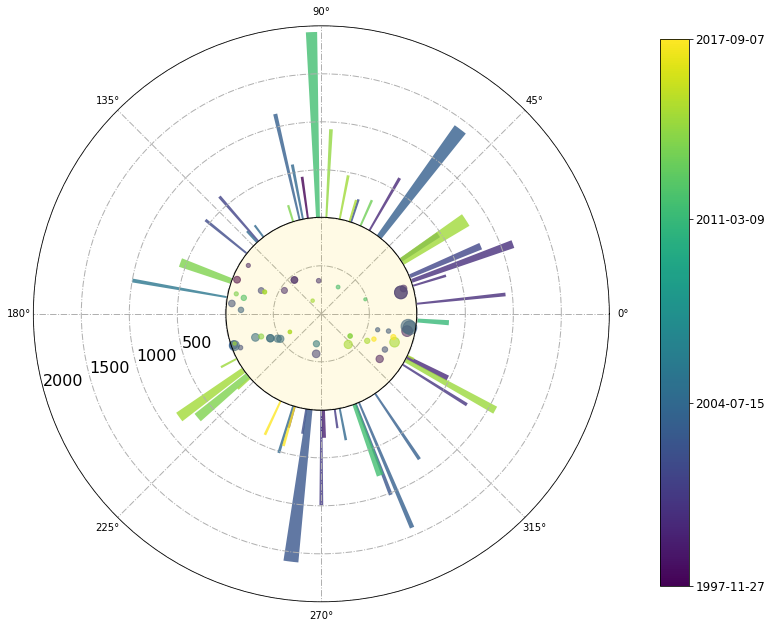

In [5]:
# Plotting
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(min(x_dates), max(x_dates))

# CMEs
fig = plt.figure(figsize=(4, 4), facecolor='white')
ax1 = plt.axes([0.025, 0.025, 2, 2], polar=True)
ax1.bar(x=x.cme_angle/180*np.pi, height=x.cme_speed, width=1/50*x.cme_halo, bottom=1000, alpha=0.8, color=cmap(norm(x_dates)))
ax1.set_ylim(0,3000)
ax1.set_yticklabels(['', '', '500', '1000', '1500', '2000'], fontsize=16)
ax1.grid(linewidth=1, linestyle='-.')
ax1.set_rlabel_position(195)

fc = colorConverter.to_rgba('gold', alpha=0.1)

# ARs
ax2 = plt.axes([0.680, 0.676, 0.69, 0.698])
ax2.set_axis_off()
circ = plt.Circle((0, 0), 960, transform=ax2.transData._b, ec='k', lw=1, fc=fc, fill=True)
ax2.add_artist(circ)
sct = ax2.scatter(x['smart_hcx_position'], x['smart_hcy_position'], s=size_f, c=x_dates, alpha=0.6)
ax2.set_xlim(-1000, 1000)
ax2.set_ylim(-1000, 1000)

# colourbar
ax3 = plt.axes([2.2, 0.08, 0.1, 1.9])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax3, orientation='vertical',
                  ticks=[min(x_dates), x_dates[23], x_dates[29], max(x_dates)])
cb.ax.set_yticklabels(['1997-11-27', '2004-07-15', '2011-03-09', '2017-09-07'], fontsize=12)

#plt.savefig('cme_polar_plot_v2.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()